# CenturyLink

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

from config import speed_labels
from analysis import (
    race, income, redlining, 
    plot_race, speed_breakdown, 
    unserved, bucket_and_bin
)

In [3]:
# inputs
fn_centurylink = '../data/output/speed_price_centurylink.csv.gz'

# outputs
fn_speed = '../data/output/figs/fig1_cl.csv'

In [4]:
cl = pd.read_csv(fn_centurylink, compression='gzip')
len(cl)

186611

In [5]:
cl.major_city.nunique()

15

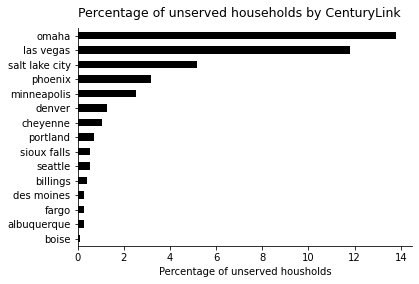

In [6]:
unserved(cl, isp='CenturyLink', height=4)

In [7]:
cl = cl[cl.price != 65]
cl = cl[cl.speed_down != 0]
len(cl)

180067

In [8]:
cl = bucket_and_bin(cl)

/home/chino/code/1_production-grade/isp/notebooks/analysis.py:141: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


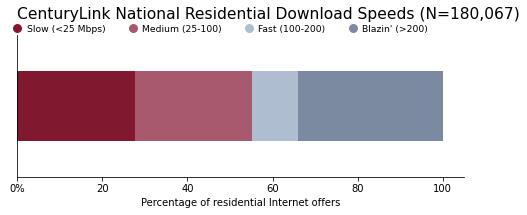

In [9]:
speed_breakdown(cl, isp='CenturyLink')

In [10]:
pd.DataFrame(cl.speed_down_bins.value_counts(normalize=True).sort_index()[1:]).to_csv(fn_speed)

/home/chino/code/1_production-grade/isp/notebooks/analysis.py:431: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


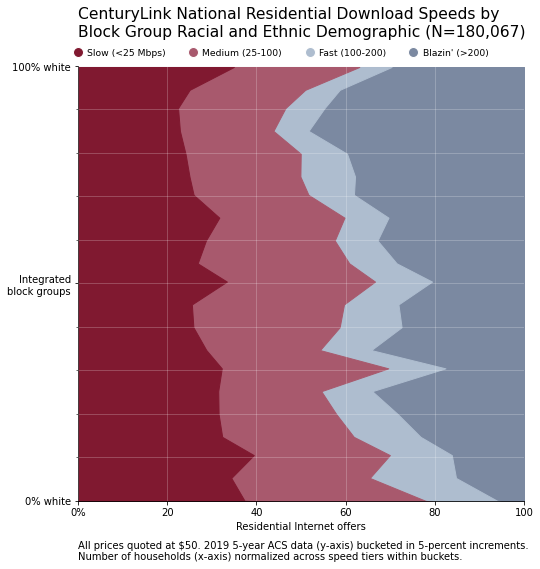

In [11]:
plot_race(cl, isp='CenturyLink', price="$50")

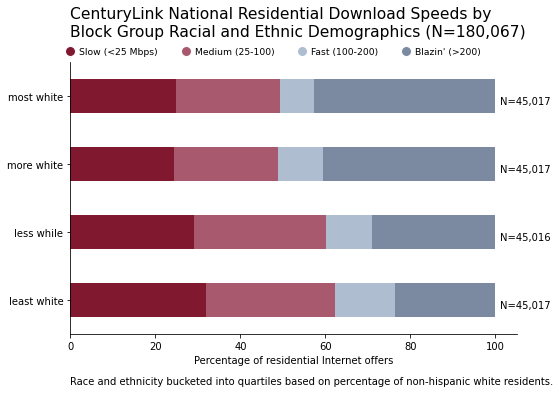

In [12]:
race(cl, isp='CenturyLink')

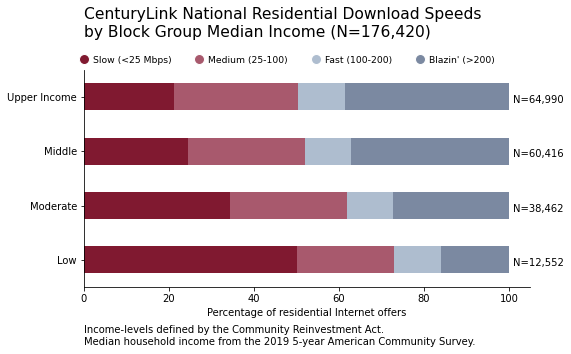

In [13]:
income(cl, isp='CenturyLink')

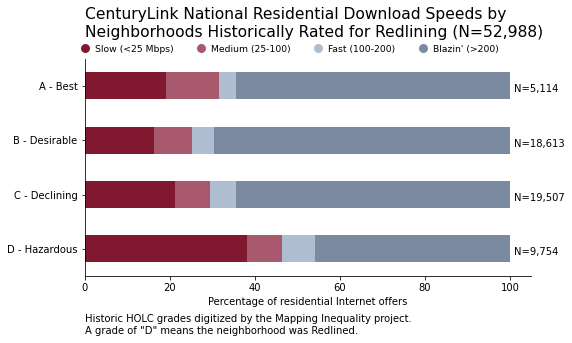

In [14]:
redlining(cl, isp='CenturyLink')

## Each City

albuquerque


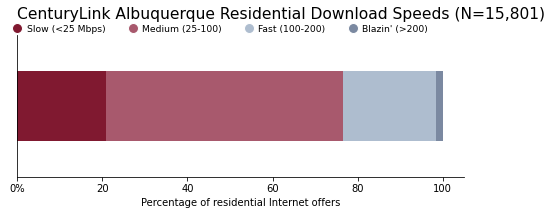

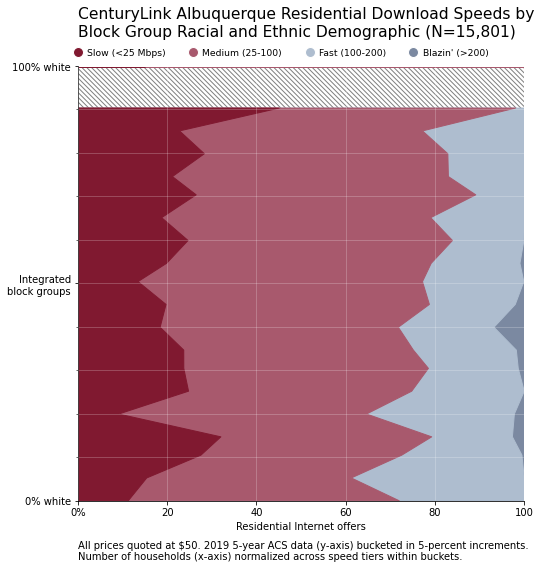

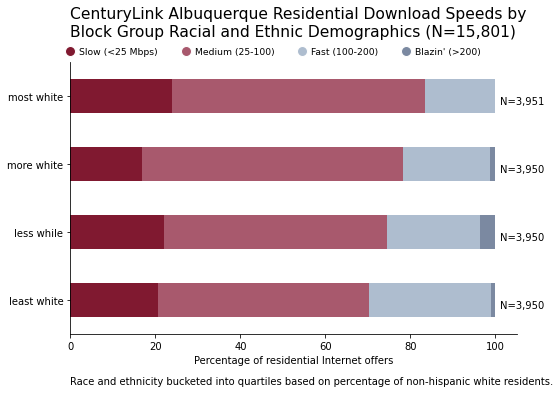

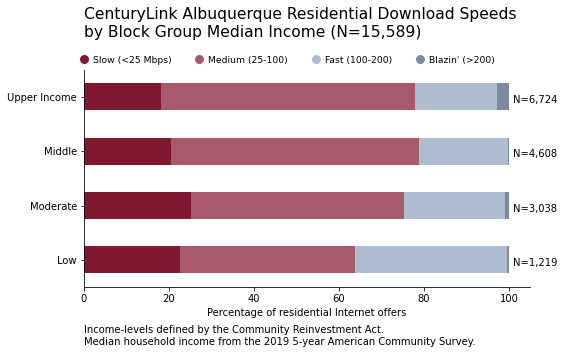

*******************************************************************************
billings


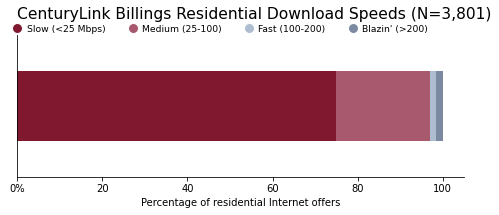

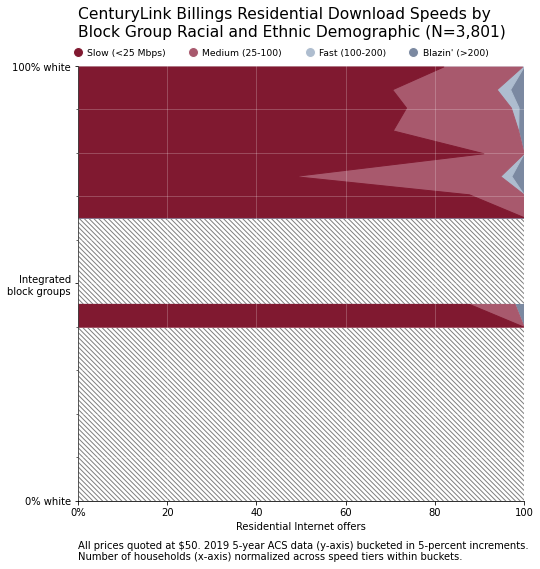

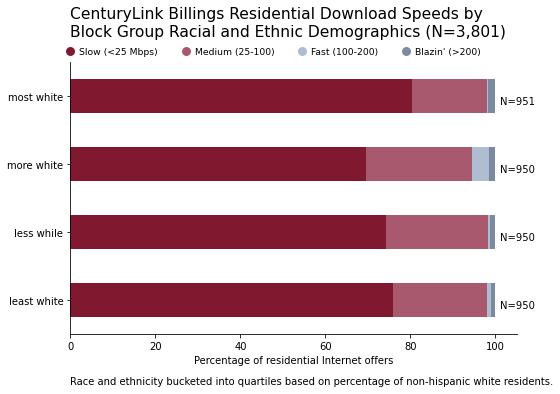

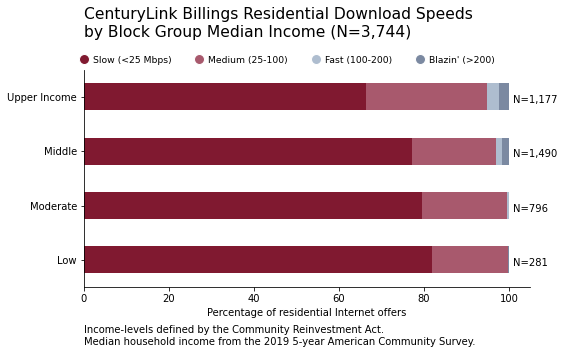

*******************************************************************************
boise


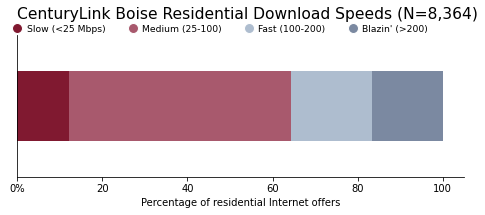

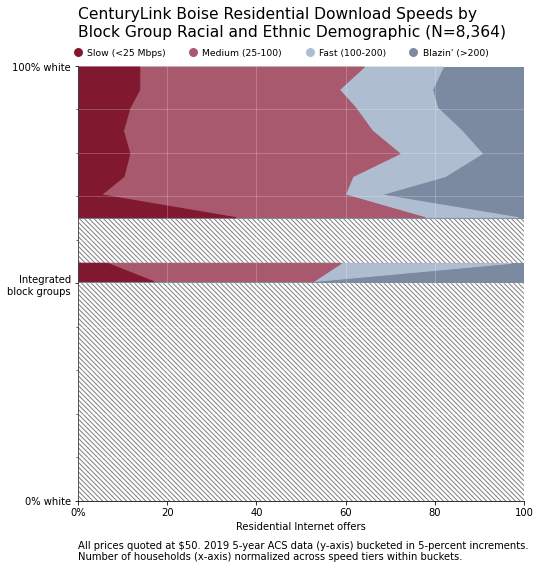

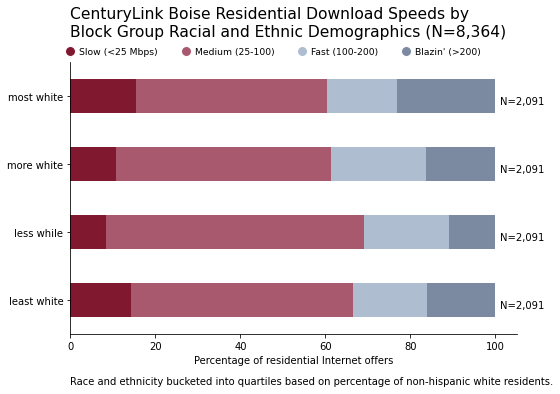

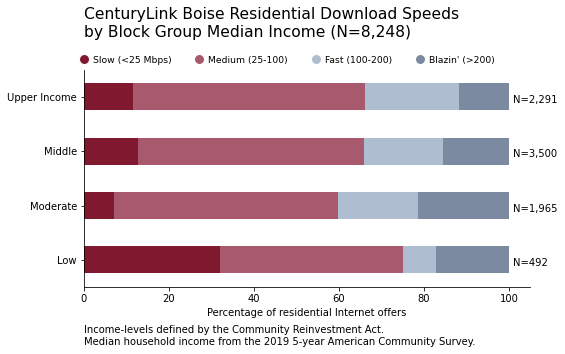

*******************************************************************************
cheyenne


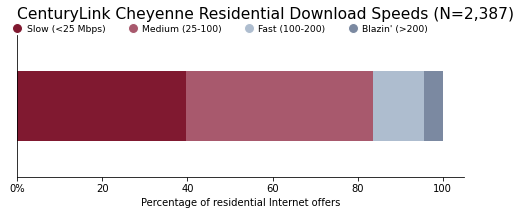

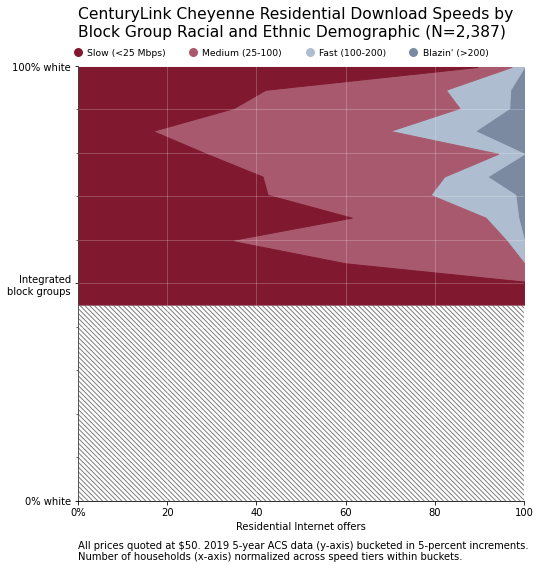

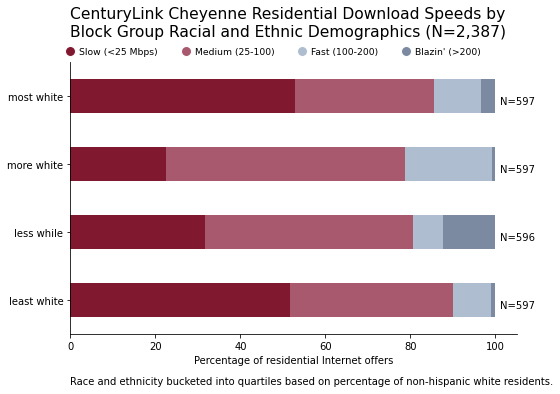

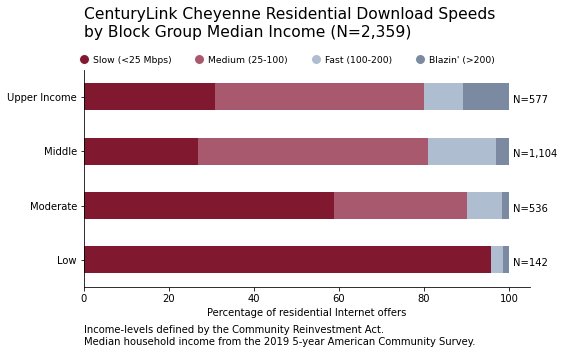

*******************************************************************************
denver


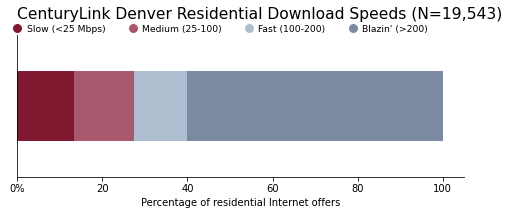

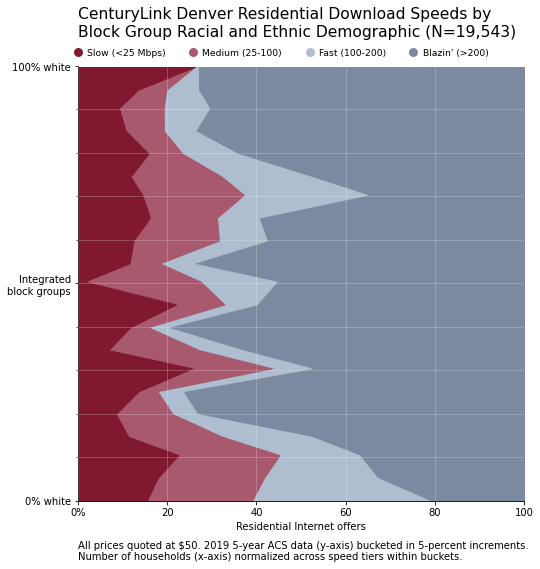

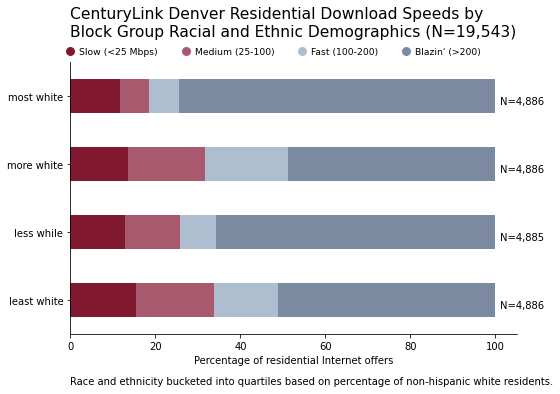

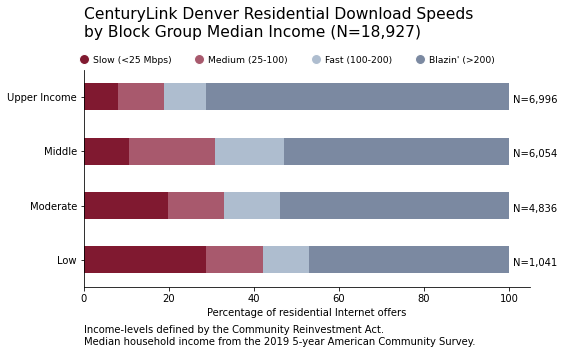

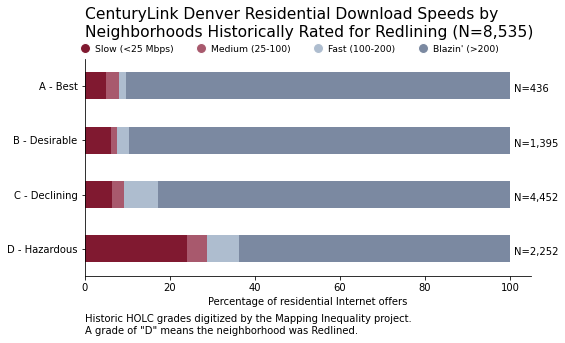

*******************************************************************************
des moines


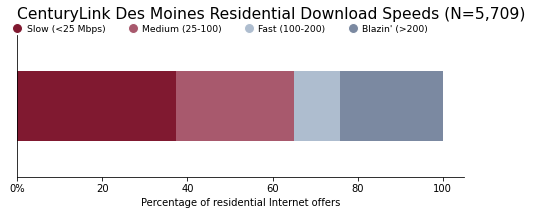

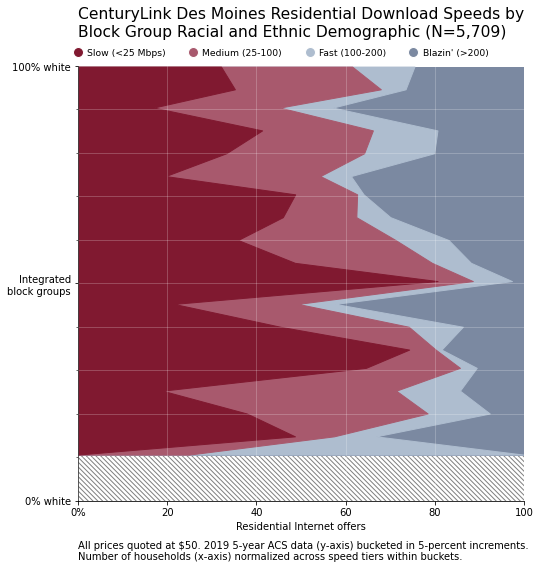

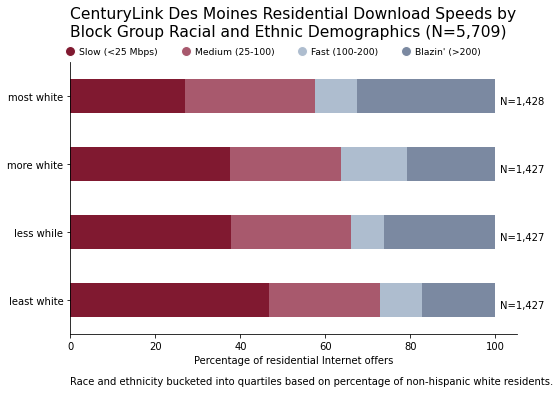

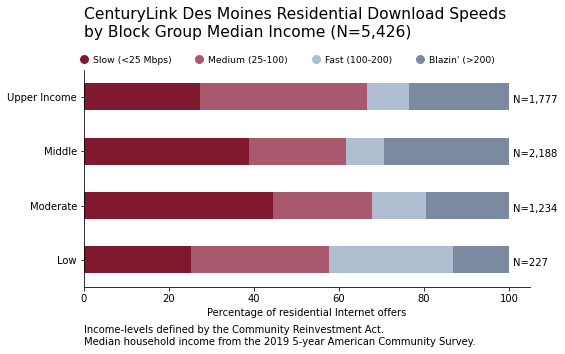

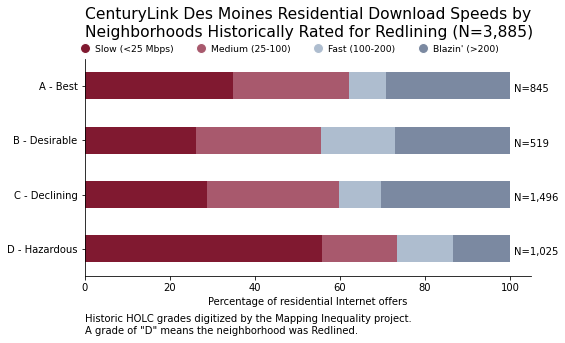

*******************************************************************************
fargo


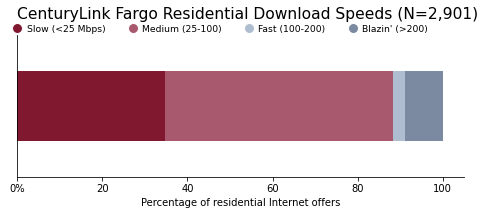

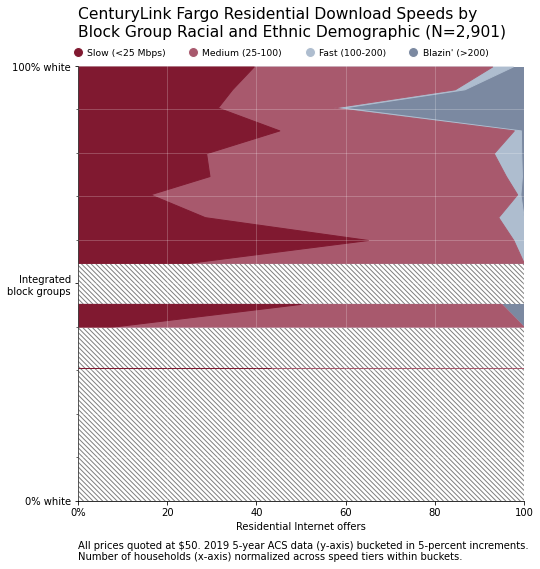

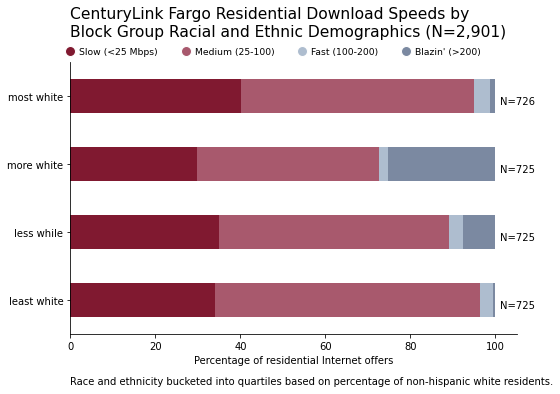

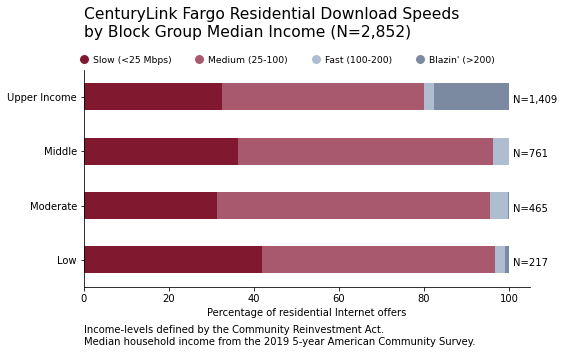

*******************************************************************************
las vegas


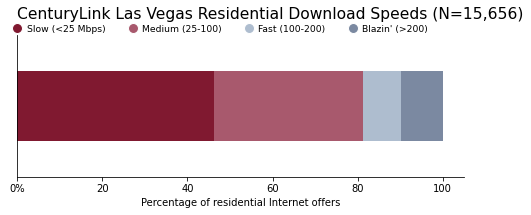

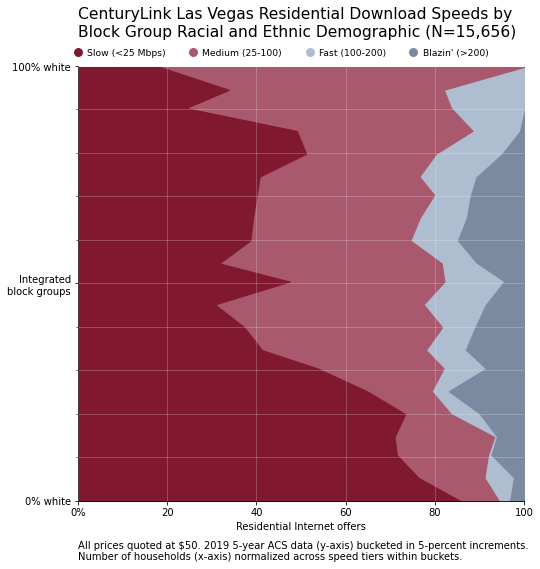

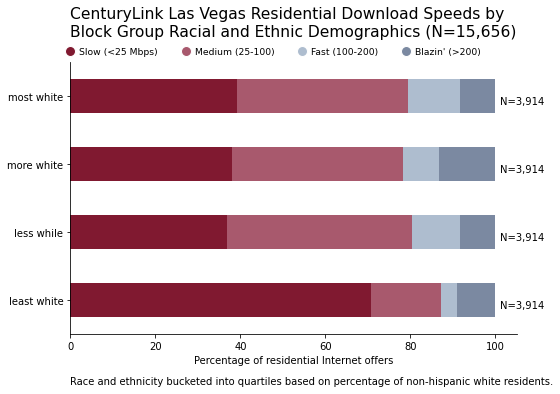

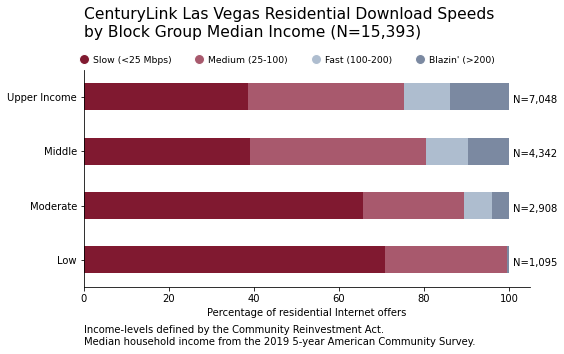

*******************************************************************************
minneapolis


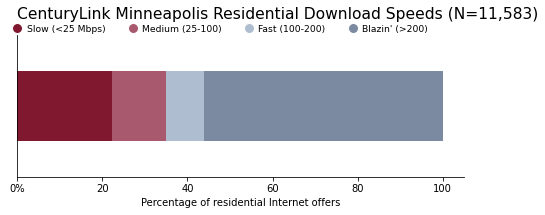

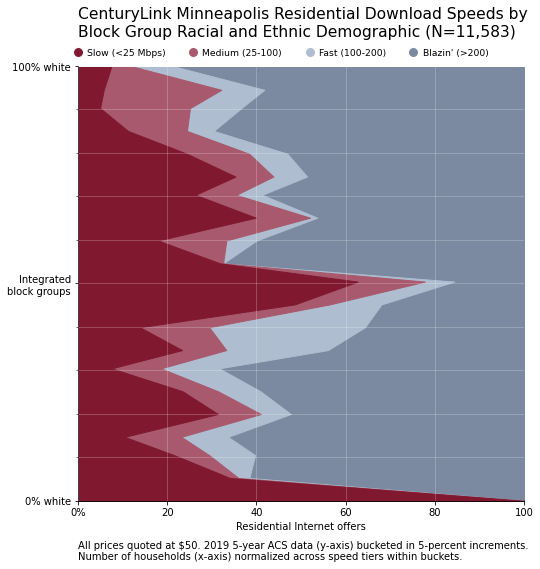

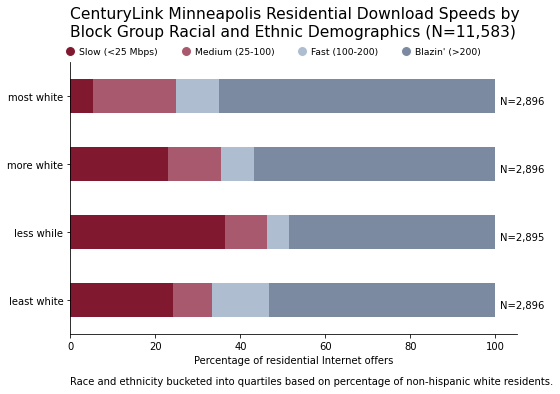

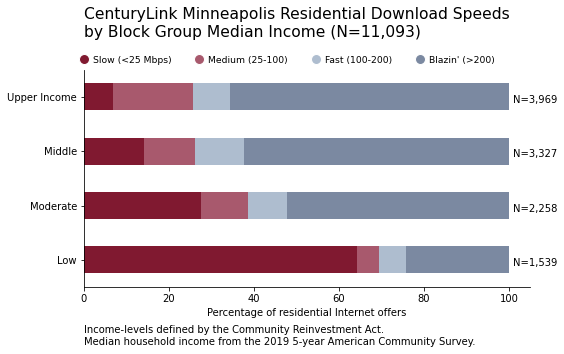

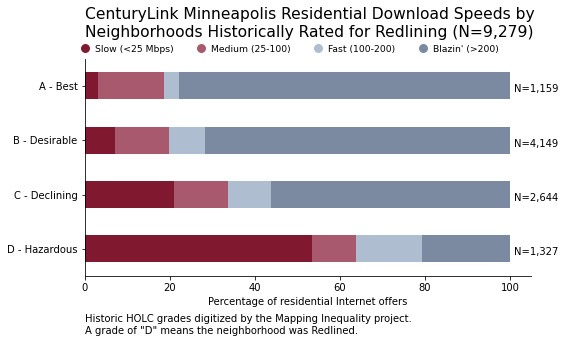

*******************************************************************************
omaha


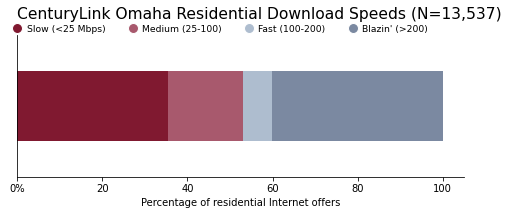

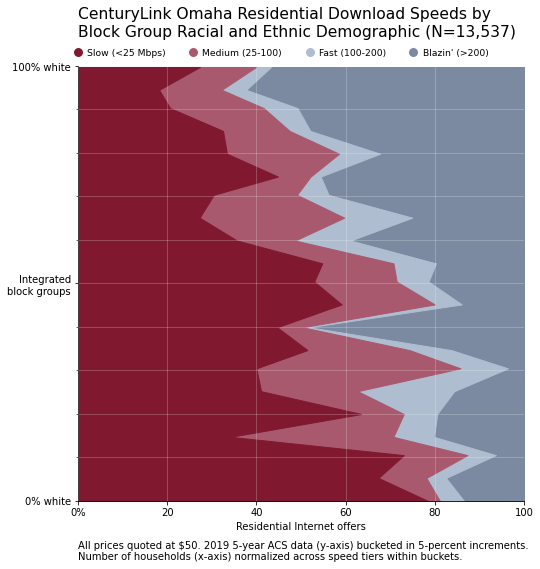

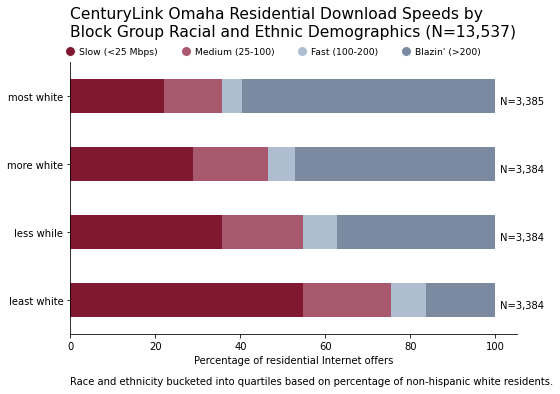

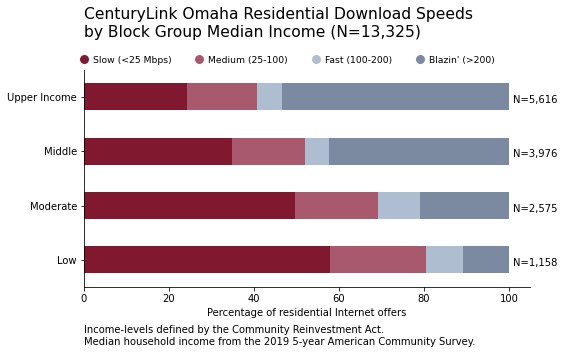

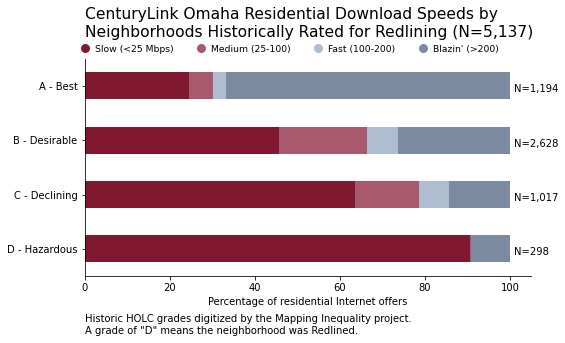

*******************************************************************************
phoenix


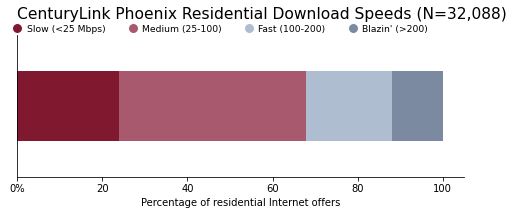

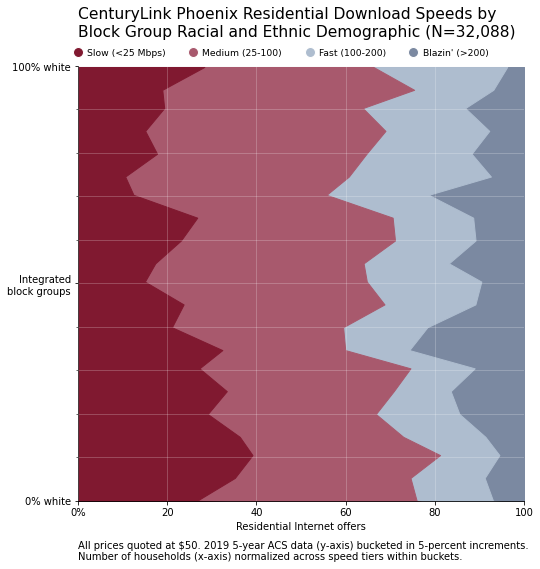

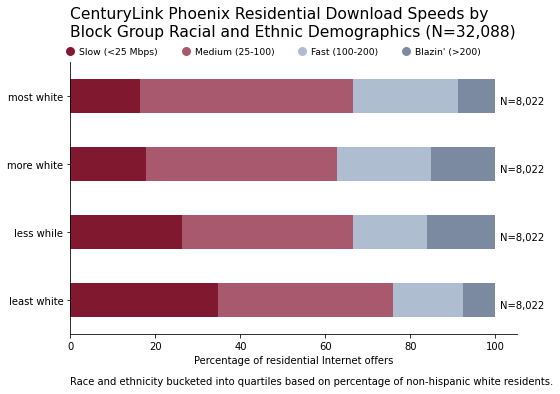

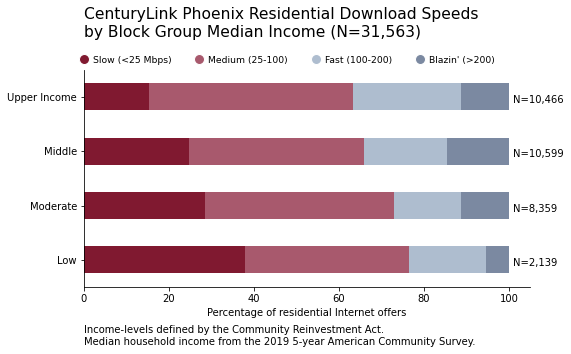

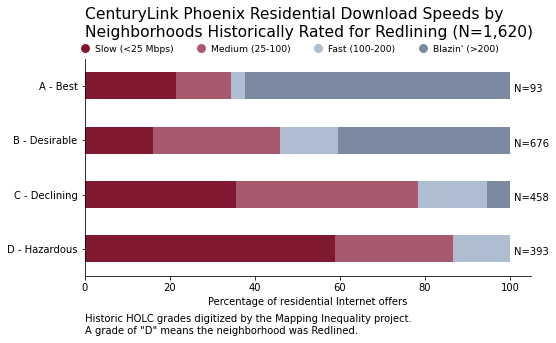

*******************************************************************************
portland


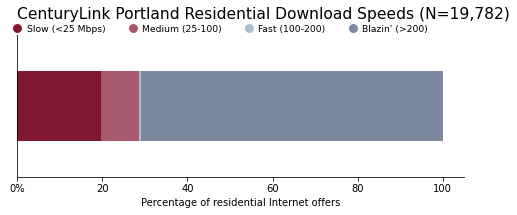

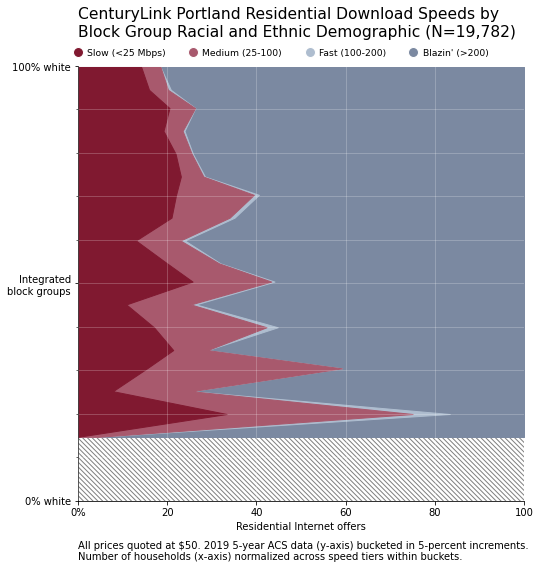

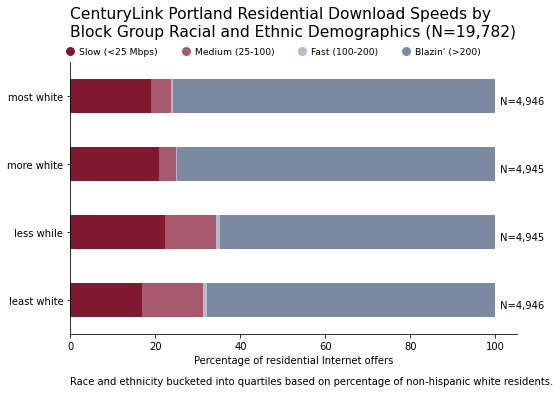

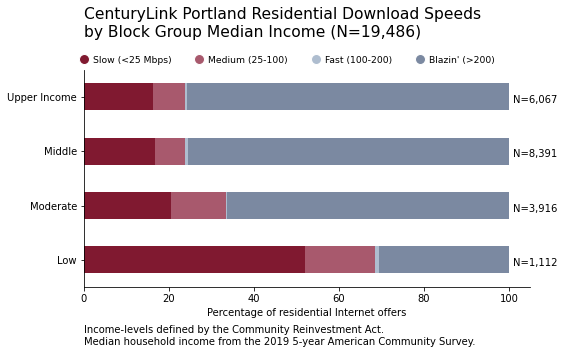

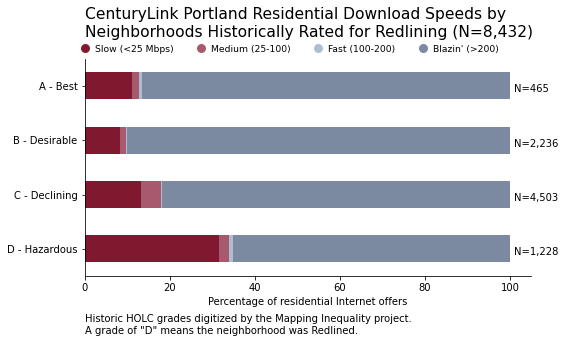

*******************************************************************************
salt lake city


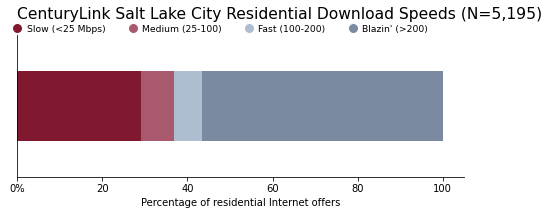

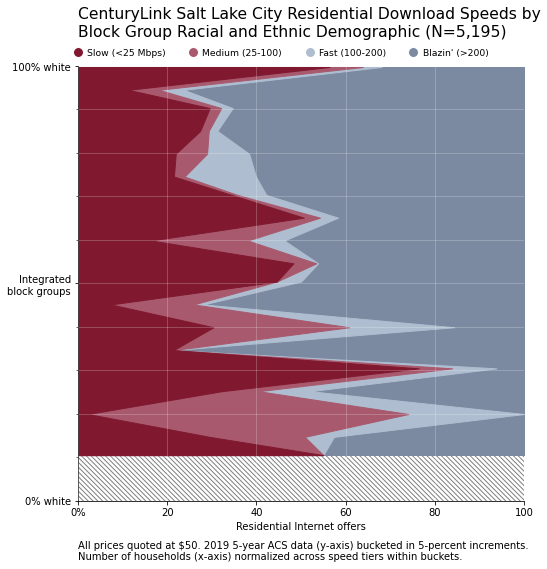

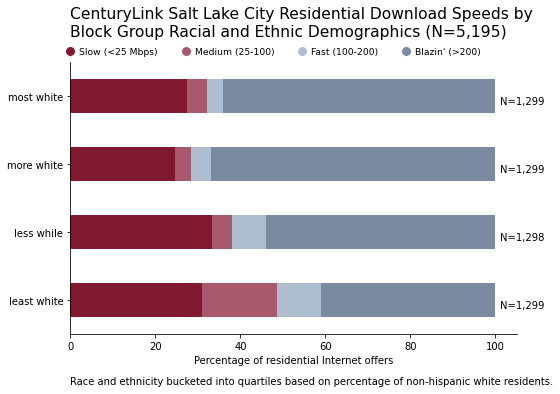

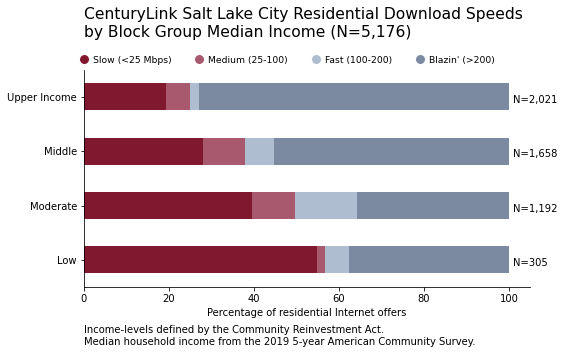

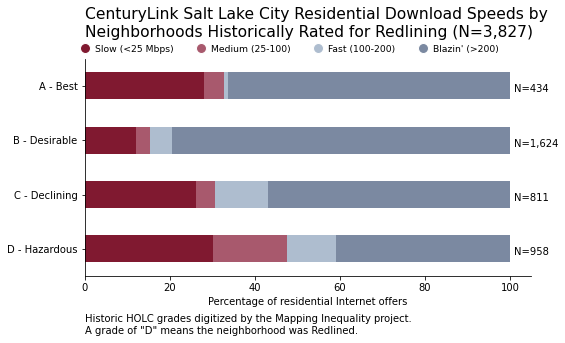

*******************************************************************************
seattle


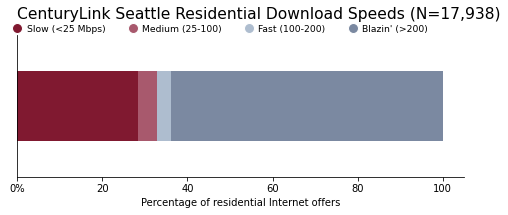

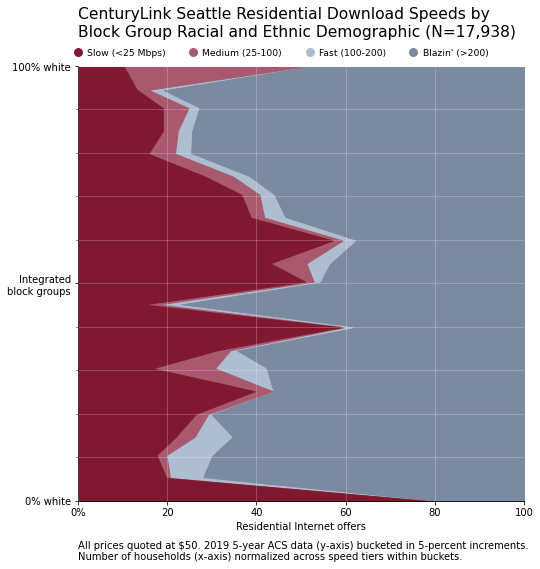

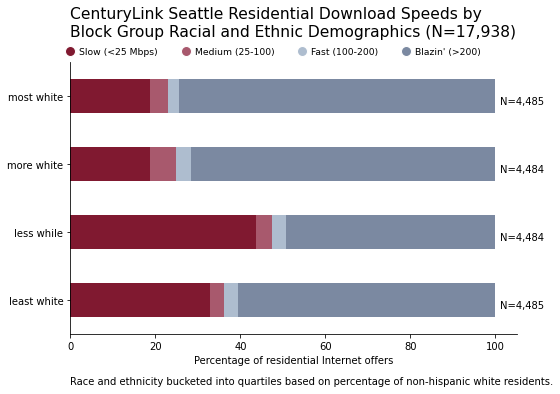

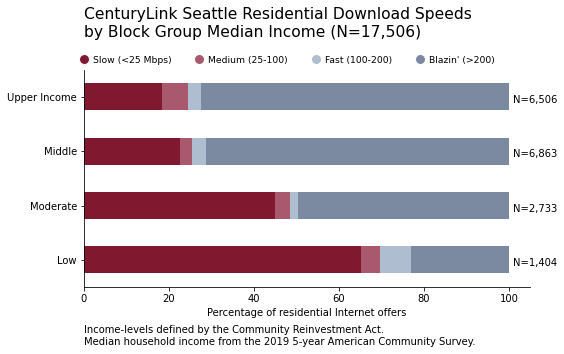

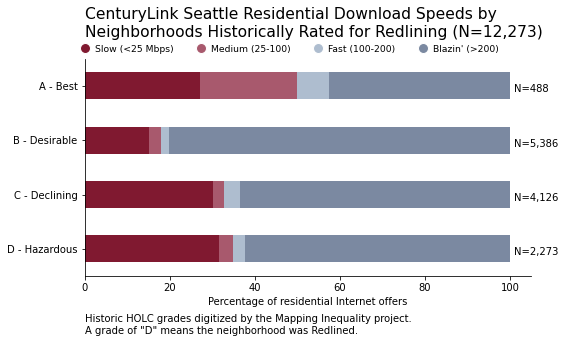

*******************************************************************************
sioux falls


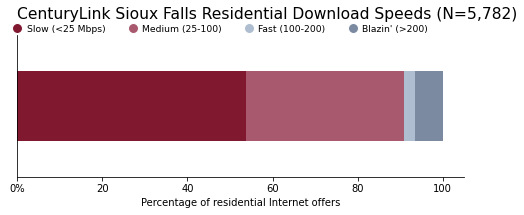

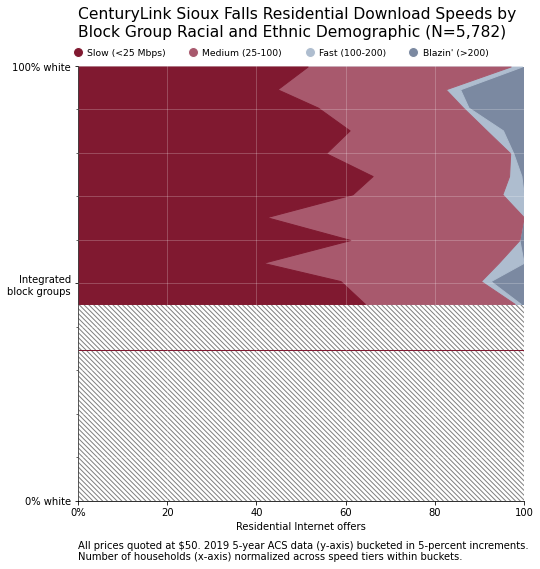

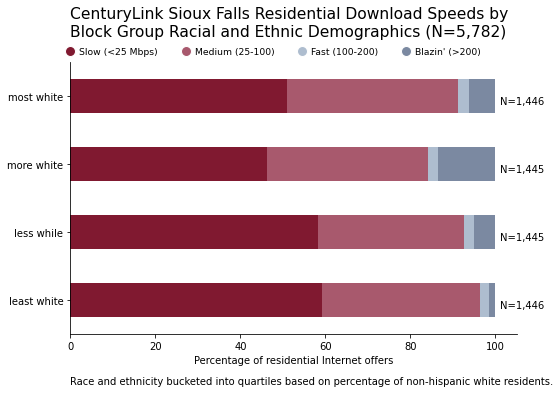

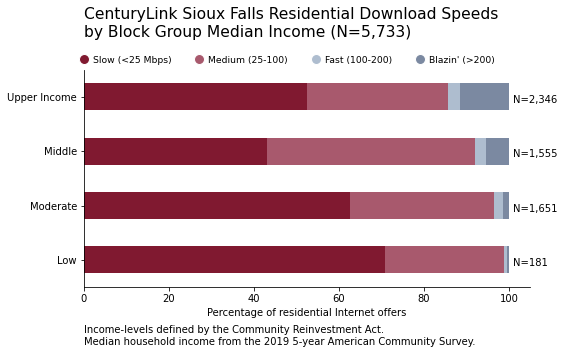

*******************************************************************************


In [15]:
for city, _df in cl.groupby('major_city'):
    print(city)
    _df = bucket_and_bin(_df)
    speed_breakdown(_df, location=city.title(), isp='CenturyLink')
    plot_race(_df, location=city.title(), isp='CenturyLink', price='$50')
    race(_df, location=city.title(), isp='CenturyLink')
    income(_df, location=city.title(), isp='CenturyLink')
    redlining(_df, location=city.title(), isp='CenturyLink')
    print("*" * 79)

In [16]:
cl.iloc[0]

address_full                              1009 E TURNEY AVE,PHOENIX,AZ 85014,USA
incorporated_place                                                  Phoenix city
major_city                                                               phoenix
state                                                                         AZ
lat                                                                    33.499563
lon                                                                  -112.059526
availability_status                                          GREEN - exact match
block_group_x                                                        40131086011
collection_datetime                                                   1650137113
provider                                                             CenturyLink
speed_down                                                                  60.0
speed_up                                                                     5.0
speed_unit                  

<AxesSubplot:xlabel='income_dollars_below_median', ylabel='ppl_per_sq_mile'>

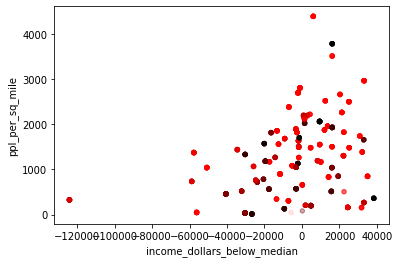

In [17]:
is_slow = {
    True : 'red',
    False : 'black'
}
to_plot = cl[cl.major_city == 'billings']

to_plot.plot(x='income_dollars_below_median', y='ppl_per_sq_mile', kind='scatter', 
             alpha=.1,
             color=[is_slow.get(c) for c in to_plot.is_slow])

<AxesSubplot:ylabel='Frequency'>

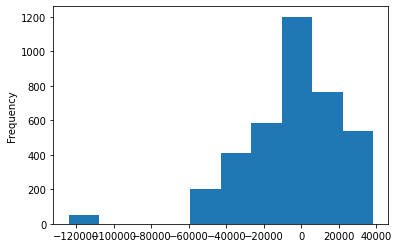

In [18]:
cl[cl.major_city == 'billings'].income_dollars_below_median.plot.hist()

<AxesSubplot:ylabel='Frequency'>

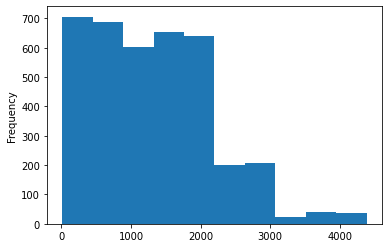

In [19]:
cl[cl.major_city == 'billings'].ppl_per_sq_mile.plot.hist()

In [20]:
cl[cl.major_city == 'billings'].income_level.value_counts(normalize=True)

Middle          0.397970
Upper Income    0.314370
Moderate        0.212607
Low             0.075053
Name: income_level, dtype: float64